### Machine Learning Application for Handwritten Digit Recognition

---

**Problem Description: Recognizing Handwritten Numbers**

**Overview:**
The task involves recognizing handwritten numbers (digits) using machine learning algorithms. Handwritten digits vary significantly in terms of writing style, size, and orientation. 

<div style="text-align: center;">
    <img src="data_files/nombres manuscrits.png">
</div>

-  the image is illustrating how numbers are written as an example for how a machine learning model could recognize them based on their shapes

**Objective:**
The objective is to develop a machine learning model capable of accurately identifying handwritten digits. This model should be trained on a dataset different representation of number in form of images grid, Once trained, the model should be able to predict the digit in unseen images with high accuracy.

**Dataset:**
The dataset consists of grayscale images of handwritten digits, each represented as a matrix of pixel values. Additionally, each image is associated with a label indicating the digit it represents (e.g., 0 to 9).

---
This code illustrates the process of creating, training, evaluating, and predicting with a decision tree classification model on a dataset of grayscale images of digits. 

- **Creation**: In this step, you initialize a decision tree classifier model. This involves setting parameters such as the maximum depth of the tree, criteria for splitting nodes, etc.

- **Training**: The model is then trained using a dataset of grayscale images of digits. During training, the model learns from the features (pixel values) of the images and their corresponding labels (the digit they represent).

- **Evaluation**: After training, the model's performance is evaluated using a separate set of images that it hasn't seen before. This evaluation measures how well the model generalizes to new, unseen data.

- **Prediction**: Once the model is trained and evaluated, it can be used to make predictions on new grayscale images of digits. Given an unseen image, the model predicts the digit it represents based on its learned patterns from the training data.

---

In [32]:
import numpy as np  # Import NumPy library for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib library for data visualization
import pandas as pd  # Import Pandas library for data manipulation and analysis
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier from scikit-learn for building decision tree models
from sklearn.model_selection import train_test_split  # Import train_test_split function for splitting dataset into training and testing sets
from copy import deepcopy  # Import deepcopy function from copy module for creating deep copies of objects

In [33]:
# Load data from a CSV file | 'as_matrix()' has been deprecated, using 'values' instead
data = pd.read_csv("data_files\\images_chiffres_codees_niveau_de_gris.csv").values # dataset contains 2559 rows

In [34]:
# Create an instance of the decision tree classifier
MyModel = DecisionTreeClassifier()

# Separate the dataset into training and testing sets
x = data[:, 1:]  
label = data[:, 0]  
x_train, x_test, y_train, y_test = train_test_split(x, label, test_size=0.2)

# Train the model using the training set
MyModel.fit(x_train, y_train)

DecisionTreeClassifier()

In [35]:
# Evaluate the model's accuracy on the test set
predictions = MyModel.predict(x_test)  # Generate predictions for the test set using the trained model
accuracy = MyModel.score(x_test, y_test)  # Calculate the accuracy of the model on the test set
print("Accuracy = " + str(accuracy * 100) + '%')  # Print the accuracy of the model on the test set

Accuracy = 71.6796875%


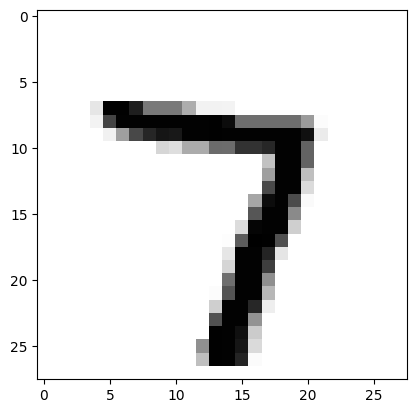

In [36]:
# Display an image from the test set
image_index = 53  # Index of the image to be displayed from the test set
image = x_test[image_index]  # Retrieve the image data from the test set
image_copy = deepcopy(image)  # Create a deep copy of the image data
image_copy.shape = (28, 28)  # Reshape the image data into a 28x28 matrix 
plt.imshow(255 - image_copy, cmap='gray')  # Display the image with inverted colors in grayscale
plt.show()  # Show the displayed image

In [37]:
# Add noise to an image and predict with the model
num_noisy_pixels = 100  # Number of noisy pixels to add to the image
for i in range(num_noisy_pixels):
    position = np.random.randint(0, 784, 1)[0]  # Randomly select a position (pixel) in the image
    noise = np.random.randint(-200, 200, 1)[0]  # Generate random noise value between -200 and 200
    image[position] += noise  # Add the noise to the selected pixel in the image
    image[position] = image[position] % 255  # Ensure the pixel value remains within the range of grayscale values (0 to 255)

The predicted number: [7]


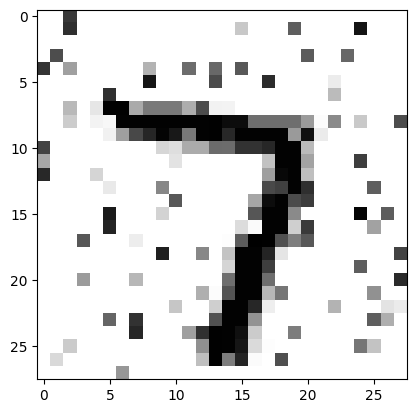

In [38]:
# Predict with the model for the noisy image
print(f"The predicted number: {MyModel.predict([image])}")  # Print the predicted number by the model for the noisy image
image.shape = (28, 28)  # Reshape the image back to its original dimensions (28x28)
plt.imshow(255 - image, cmap='gray')  # Display the noisy image with inverted colors in grayscale
plt.show()  # Show the displayed noisy image